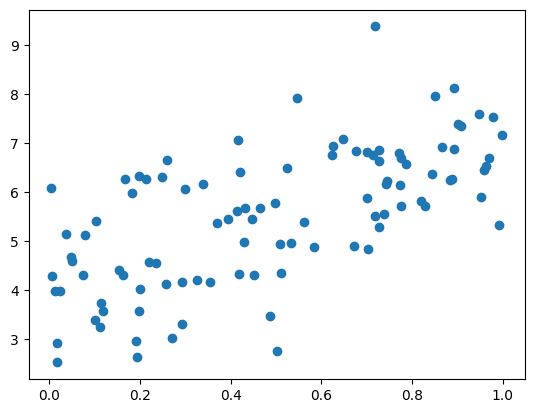

theta [4.02469061 3.00847641]


In [1]:
# 多维线性回归问题（梯度下降法）: https://blog.csdn.net/m0_47146037/article/details/120965340

import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(666)
# 用一维数据方便可视化，但实际是对矩阵进行操作
x = np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100) # 噪音：均值为0，方差为1

X = x.reshape(-1, 1) # 数组array中的方法，作用是将数据重新组织成100行1列的数据

# print('X数组', X.shape)
# print('y数组', y.shape)

plt.scatter(x, y)
plt.show()

# 损失函数
def J(theta, X_b, y):
  try:
    return np.sum((y - X_b.dot(theta)) ** 2 / len(X_b))
  except:
    return float('inf') # 返回float最大值

# 梯度(比较笨的方法)
def dJ(theta, X_b, y):
  res = np.empty(len(theta)) # 开一个和theta一样大的空间(因为要对theta的每一个元素求偏导)
  res[0] = np.sum(X_b.dot(theta) - y) # 第一行单独写，其他的要写一个循环
  for i in range(1, len(theta)):
    res[i] = (X_b.dot(theta) - y).dot(X_b[:,i]) # X_b[:,i]相当于取出第i列，也就是第i个特征值
  return res * 2 / len(X_b)

# 直接复制之前模拟梯度下降过程的代码,然后进行更改
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
  theta = initial_theta
  i_iters = 0

  while i_iters < n_iters:
      gradient = dJ(theta, X_b, y) # 求梯度
      last_theta = theta # theta重新赋值前，记录上一场的值
      theta = theta - eta * gradient # 通过一定的eta学习率取得下一个点的theta
      # 最近两点的损失函数差值小于一定精度，退出循环
      if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
          break
      i_iters += 1
  return theta


''' 
  初始化数值
'''
# X添加一列样本个数行、1列，每个取值都是1的一列
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1]) # 设置n+1维的向量,X_b.shape[1]:第一行的维数
eta = 0.1

theta = gradient_descent(X_b, y, initial_theta, eta)

print('theta', theta)
